First of all we download dataset.

In [1]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame

EDA

In [8]:
print(df.head())
print(df.shape)
print(df.describe())
print(df.isnull().sum())
print(df.info())

   MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedHouseVal
0  8.3252      41.0  6.984127  ...     37.88    -122.23        4.526
1  8.3014      21.0  6.238137  ...     37.86    -122.22        3.585
2  7.2574      52.0  8.288136  ...     37.85    -122.24        3.521
3  5.6431      52.0  5.817352  ...     37.85    -122.25        3.413
4  3.8462      52.0  6.281853  ...     37.85    -122.25        3.422

[5 rows x 9 columns]
(20640, 9)
             MedInc      HouseAge  ...     Longitude   MedHouseVal
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.563400     18.000000  ...   -121.800000      1.196000
50%        3.534800     29.000000  ...   -118.490000      1.797000
75%        4.743250     37.000000  ...   -118.010000      2.647250
max       15.0001

more EDA

In [ ]:
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


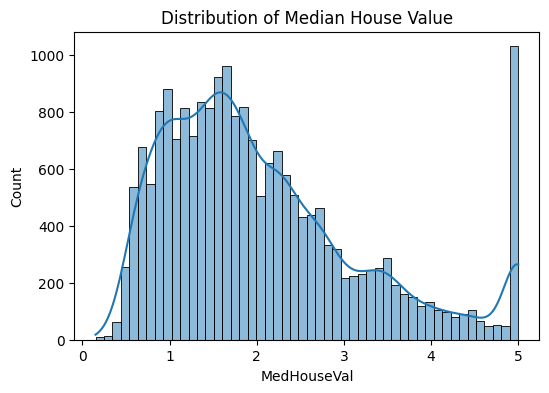

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['MedHouseVal'],bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.show()


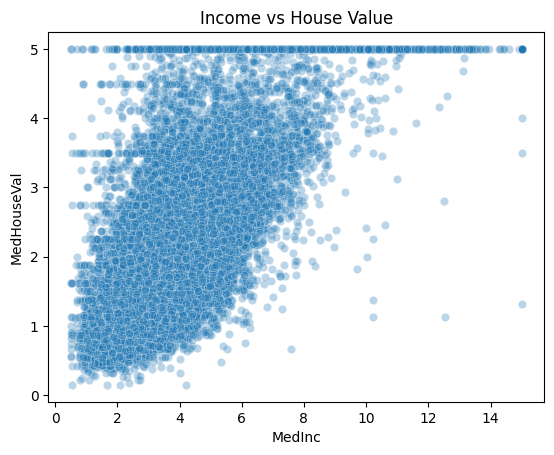

In [11]:
#scatter of inccome
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.3)
plt.title("Income vs House Value")
plt.show()


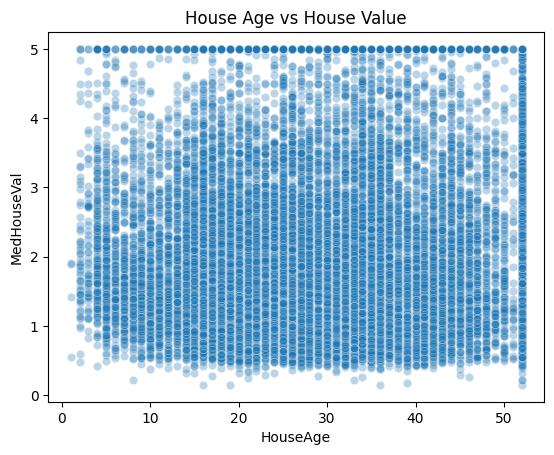

In [12]:
#scatter plot of house age
sns.scatterplot(x='HouseAge', y='MedHouseVal', data=df, alpha=0.3)
plt.title("House Age vs House Value")
plt.show()

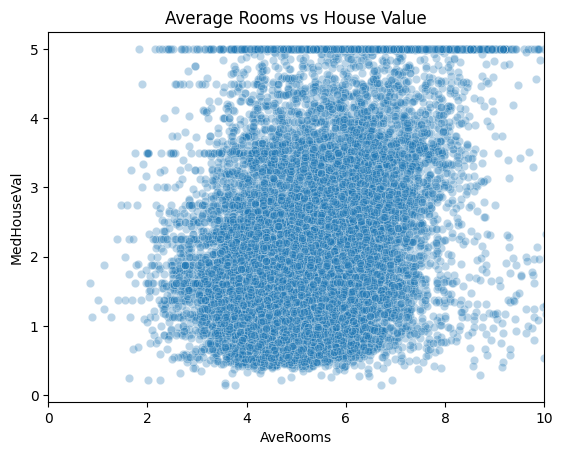

In [15]:
#scatter plot of average rooms
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=df, alpha=0.3)
plt.title("Average Rooms vs House Value")
plt.xlim(0,10)
plt.show()

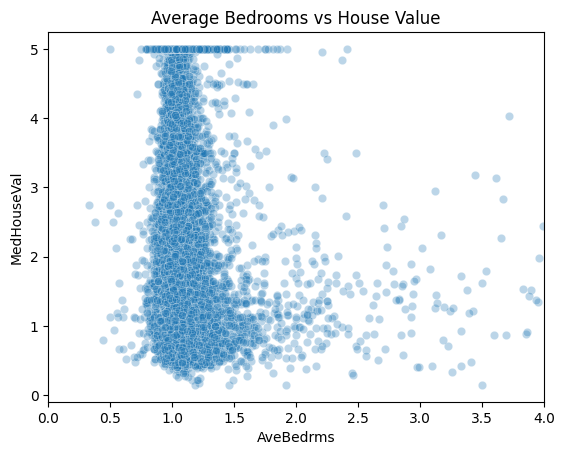

In [18]:
sns.scatterplot(x='AveBedrms',y='MedHouseVal', data=df, alpha=0.3)
plt.title("Average Bedrooms vs House Value")
plt.xlim(0,4)
plt.show()

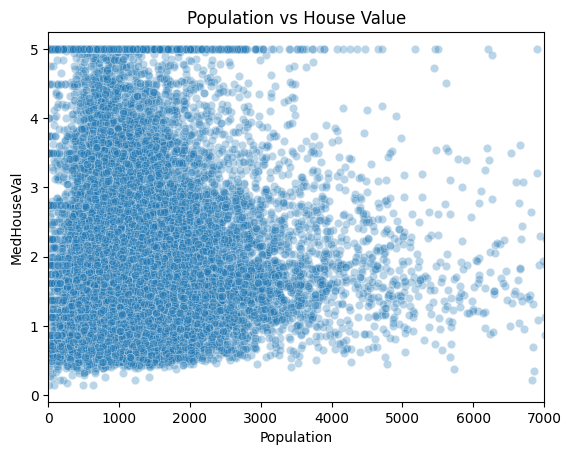

In [24]:
sns.scatterplot(x='Population',y='MedHouseVal', data=df, alpha=0.3)
plt.title("Population vs House Value")
plt.xlim(0,7000)
plt.show()

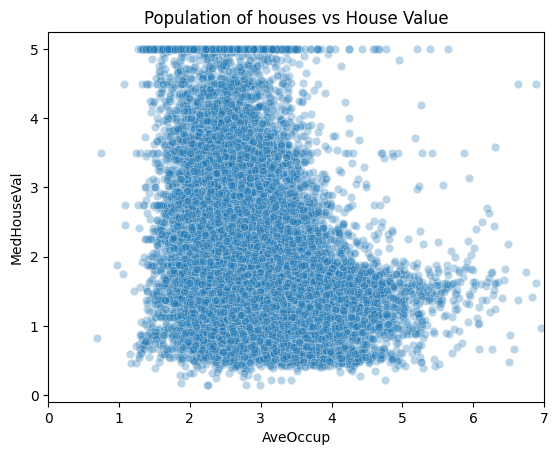

In [26]:
sns.scatterplot(x='AveOccup',y='MedHouseVal', data=df, alpha=0.3)
plt.title("Population of houses vs House Value")
plt.xlim(0,7)
plt.show()

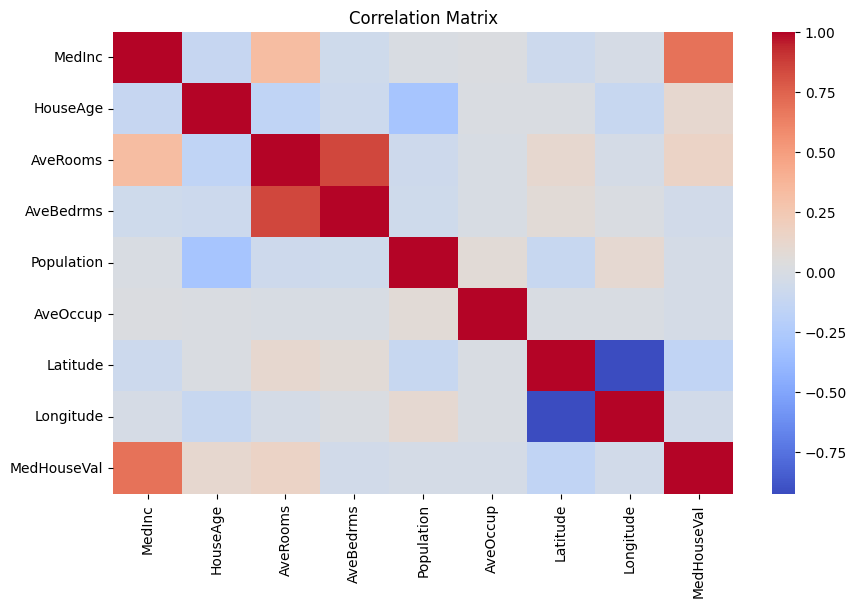

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#1.split X & y

In [29]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

#2.Train/Test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3.scailing

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#4.modeling

In [33]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)

#5.testing and erroors

In [35]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE", mse)
print("RMSE", rmse)
print("R^2:", r2)

MSE 0.5558915986952444
RMSE 0.7455813830127764
R^2: 0.5757877060324508


#visualization

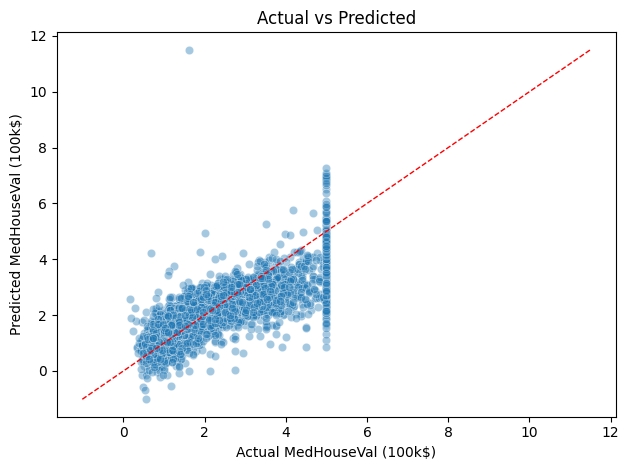

In [ ]:
y_test_arr = np.array(y_test)
y_pred_arr = np.array(y_pred)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_arr, y=y_pred_arr, alpha=0.4)
minv = min(y_test_arr.min(), y_pred_arr.min())
maxv = max(y_test_arr.max(), y_pred_arr.max())
plt.plot([minv, maxv],[minv, maxv], 'r--', linewidth=1)
plt.xlabel('Actual MedHouseVal (100k$)')
plt.ylabel('Predicted MedHouseVal (100k$)')
plt.title('Actual vs Predicted')
plt.tight_layout()
plt.show()

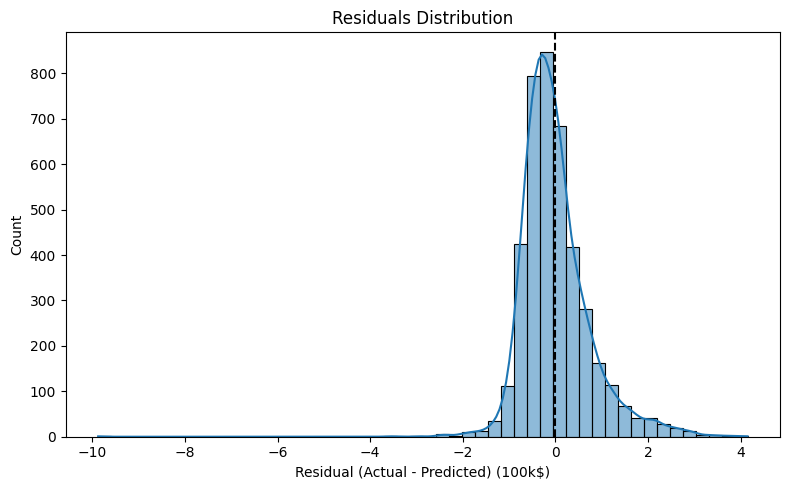

In [38]:
residuals = y_test_arr - y_pred_arr
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True)
plt.axvline(0, color='k', linestyle='--')
plt.xlabel('Residual (Actual - Predicted) (100k$)')
plt.title('Residuals Distribution')
plt.tight_layout()
plt.show()

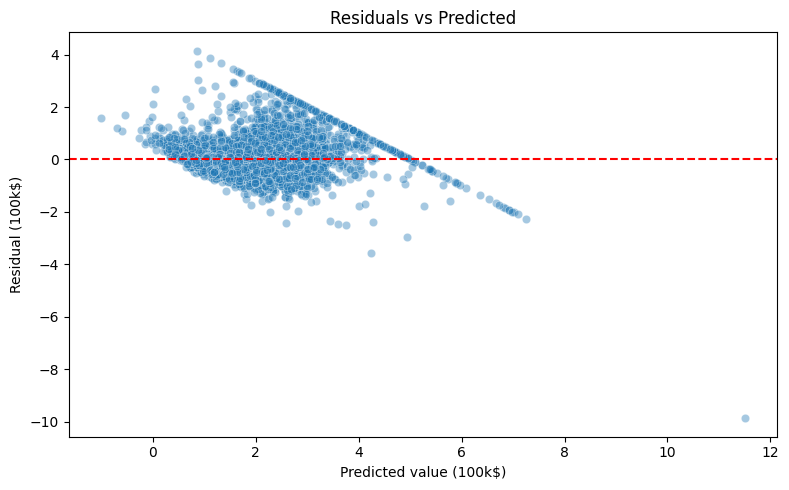

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_arr, y=residuals, alpha=0.4)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted value (100k$)')
plt.ylabel('Residual (100k$)')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.show()


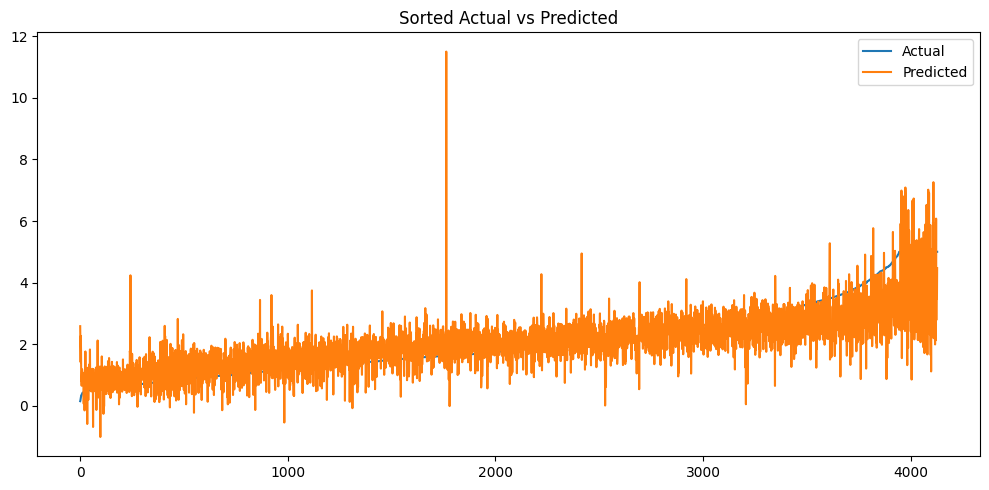

In [40]:
idx = np.argsort(y_test_arr)
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(y_test_arr)), y_test_arr[idx], label='Actual')
plt.plot(np.arange(len(y_test_arr)), y_pred_arr[idx], label='Predicted')
plt.legend()
plt.title('Sorted Actual vs Predicted')
plt.tight_layout()
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(y_test_arr, y_pred_arr)
print("MAE:", mae,"-->", round(mae*10000, 1), "dollars")
print("RMSE(dollars):", round(np.sqrt(((y_test_arr - y_pred_arr)**2).mean())*100000, 1))

MAE: 0.5332001304956564 --> 5332.0 dollars
RMSE(dollars): 74558.1
